In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Load Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Image"

In [ ]:
arr_path = []

In [ ]:
for i in os.listdir(path):
  print(os.path.join(path,i))
  arr_path.append(os.path.join(path,i))

/content/drive/MyDrive/Image/anh1.jpg
/content/drive/MyDrive/Image/anh2.jpg
/content/drive/MyDrive/Image/anh3.jpg
/content/drive/MyDrive/Image/anh5.jpg
/content/drive/MyDrive/Image/anh4.jpg
/content/drive/MyDrive/Image/anh6.jpg


In [ ]:
filepath = arr_path[0]
filepath

'/content/drive/MyDrive/Image/anh1.jpg'

**Show Image**

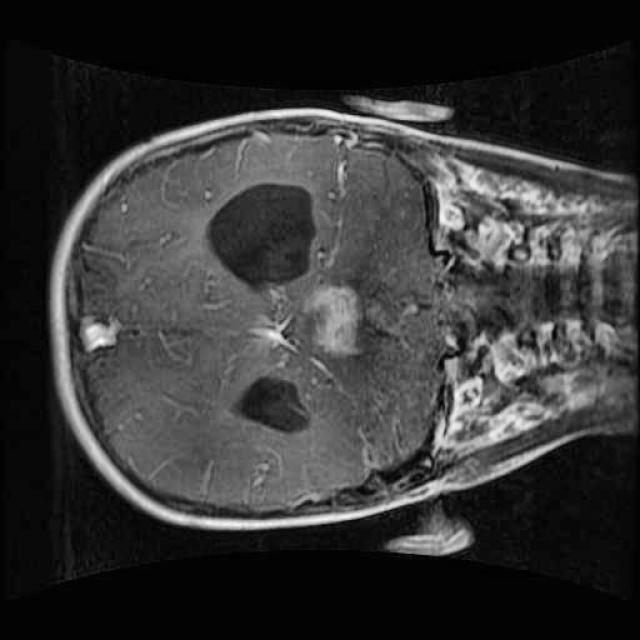

In [ ]:
img = cv2.imread(filepath)
cv2_imshow(img)

Size Image

In [ ]:
img.shape

(640, 640, 3)

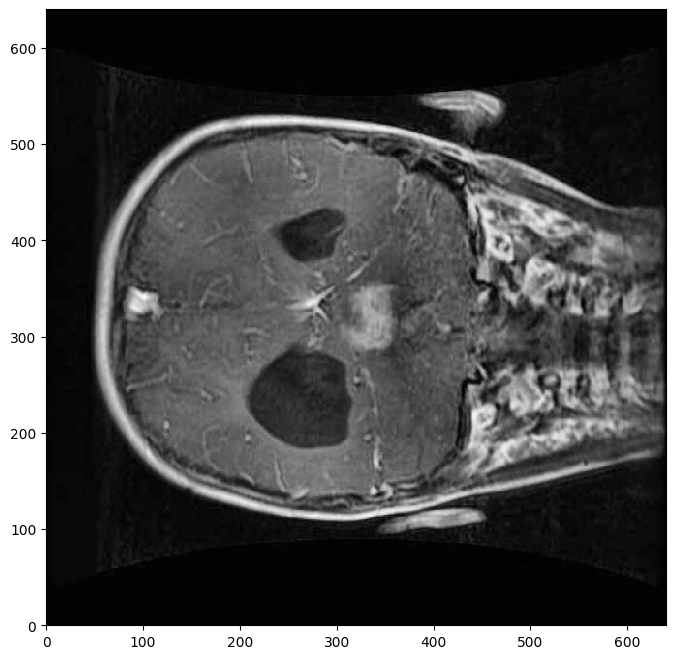

In [ ]:
plt.figure(figsize=(8,8))
plt.pcolormesh(img, cmap='Greys_r')

# **Kmean**

In [ ]:
def preprocess(img):
  pixels = img.reshape(-1)
  pixels = pixels.tolist()
  return pixels

tính khoảng cách euclidean

In [ ]:
def euclidean_distance(x,y):
  return np.sqrt(np.sum((x-y) **2))

hàm tính trung bình cụm

In [ ]:
def mean(cluster):
  if len(cluster) == 0:
    return 0

  return sum(cluster) / len(cluster)

kiểm tra điều kiện dừng

In [ ]:
from numpy import allclose

def check_convergence(centers, prev_centers):

  converged = True

  for i in range(len(centers)):
    if not allclose(centers[i], prev_centers[i]):
      converged = False
      break

  return converged

kmean

In [ ]:
def k_means(pixels, k):
    # Chọn k trung tâm ngẫu nhiên
  centers = random.sample(pixels, k)

  # Khởi tạo các cụm
  clusters = {i:[] for i in range(k)}

  for p in pixels:
    distances = [euclidean_distance(p,c) for c in centers]
    cluster = distances.index(min(distances))
    clusters[cluster].append(p)

  converged = False
  while not converged:

    #tính lại trung tâm
    for i in range(k):
      centers[i] = mean(clusters[i])

    #gán lại các điểm ảnh vào cụm mới
    for p in pixels:
      distances = [euclidean_distance(p,c) for c in centers]
      cluster = distances.index(min(distances))
      clusters[cluster].append(p)
      clusters[cluster].remove(p)

    #check điều kiện dừng
    if check_convergence(clusters, centers):
      converged = True

  return cluster

In [ ]:
k = 4

In [ ]:
img = cv2.imread(filepath)

In [ ]:
pixels = preprocess(img)

In [ ]:
clusters = k_means(pixels, k)

In [ ]:
colors = [(random.random(),random.random(),random.random()) for i in range(k)]

In [ ]:
for i, cluster in clusters.items():
  color = colors[i]

In [ ]:
colored_img = np.zeros(img.shape + (3,))
for p in cluster:
  colored_img[p] = color